<a href="https://colab.research.google.com/github/dunliangyang2010/AutoKeras/blob/main/AutoKeras_Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Installing Auto-Keras
````pip3 install autokeras```` may ouccur error due to package confilct with current version of autokeras, sometimes needs to rollback the version of related packages

In [1]:
# rollback related packages
!pip3 install --upgrade numpy==1.20
!pip3 install --upgrade folium==0.2.1
!pip3 install --upgrade imgaug==0.2.7

     |████████████████████████████████| 15.3 MB 6.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 69 kB 3.7 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=a915d5fe4f9e651d5e4f54d8d57cb73bddf4a431ccd4c705d9dbc4907bb31b42
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
     |████████████████████████████████| 644 kB 5.3 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.7 which is incompatible.


In [2]:
# install autokeras
!pip3 install autokeras

     |████████████████████████████████| 160 kB 4.9 MB/s 
     |████████████████████████████████| 98 kB 3.1 MB/s 
     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 462 kB 48.0 MB/s 
     |████████████████████████████████| 1.4 MB 38.8 MB/s 
     |████████████████████████████████| 5.8 MB 36.6 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0


In [1]:
import autokeras as ak
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#### Getting the MNIST dataset
Download the MNIST data and have a quick look to the dataset shape

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


The output above that each dataset contains images of size 28x28 pixels.

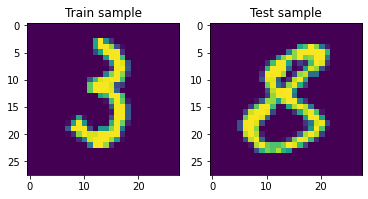

In [ ]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
plt.imshow(x_train[1234])
ax.set_title('Train sample')
ax = fig.add_subplot(1, 2, 2)
plt.imshow(x_test[1234])
ax.set_title('Test sample')
plt.show()

#### Distribution of datasets?

When we are working with data sets, it is very important to check that the data is distributed homogeneously


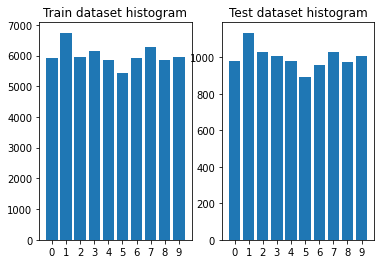

In [ ]:
train_histogram = np.histogram(y_train)
test_histogram = np.histogram(y_test)
_, axs = plt.subplots(1, 2)
axs[0].set_xticks(range(10))
axs[0].bar(range(10), train_histogram[0])
axs[0].set_title('Train dataset histogram')
axs[1].set_xticks(range(10))
axs[1].bar(range(10), test_histogram[0])
axs[1].set_title('Test dataset histogram')
plt.show()

#### Creating an image classifier

Using the AutoKeras ImageClassifier to find the best classification model. Just for this little example, we set max_trials (the maximum number of different Keras Models to try) to 1 and the number of epochs to train each model to 20, but for real use it is recommended to set a large number of trials and not to set the epochs parameter to use an adaptive number of epochs automatically.

In [ ]:
# Create a image classifier object defining
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

# Search for the optimal classifier for the MNIST training dataset
clf.fit(x_train, y_train, epochs=20)

Trial 1 Complete [00h 57m 32s]
val_loss: 0.03830929100513458

Best val_loss So Far: 0.03830929100513458
Total elapsed time: 00h 57m 32s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
1875/1875 [==============================] - 174s 93ms/step - loss: 0.2204 - accuracy: 0.9300
Epoch 2/20
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0780 - accuracy: 0.9762
Epoch 3/20
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 4/20
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0499 - accuracy: 0.9843
Epoch 5/20
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0415 - accuracy: 0.9872
Epoch 6/20
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0399 - accuracy: 0.9876
Epoch 7/20
1875/1875 [==============================] - 151s 81ms/step - loss: 0.0366 - accuracy: 0.9880
Epoch 8/20
1875/1875 [==============================] - 150s 80ms/step - loss: 0.0339 - acc

#### Evaluating the model with the test set
After training it's time to measure the real prediction of our model using the reserved test dataset

In [ ]:
metrics = clf.evaluate(x_test, y_test)
print(metrics)

313/313 [==============================] - 8s 23ms/step - loss: 0.0253 - accuracy: 0.9923
[0.02533574588596821, 0.9922999739646912]


#### Visualizing the classifier model
Take a look at the architecture of the best generated model

In [ ]:
# First we export the model to a keras model
model = clf.export_model()

# Ask for the model Sumary:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32_2 (CastToFl  (None, 28, 28)           0         
 oat32)                                                          
                                                                 
 expand_last_dim_2 (ExpandLa  (None, 28, 28, 1)        0         
 stDim)                                                          
                                                                 
 normalization_1 (Normalizat  (None, 28, 28, 1)        3         
 ion)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                           

Plot model

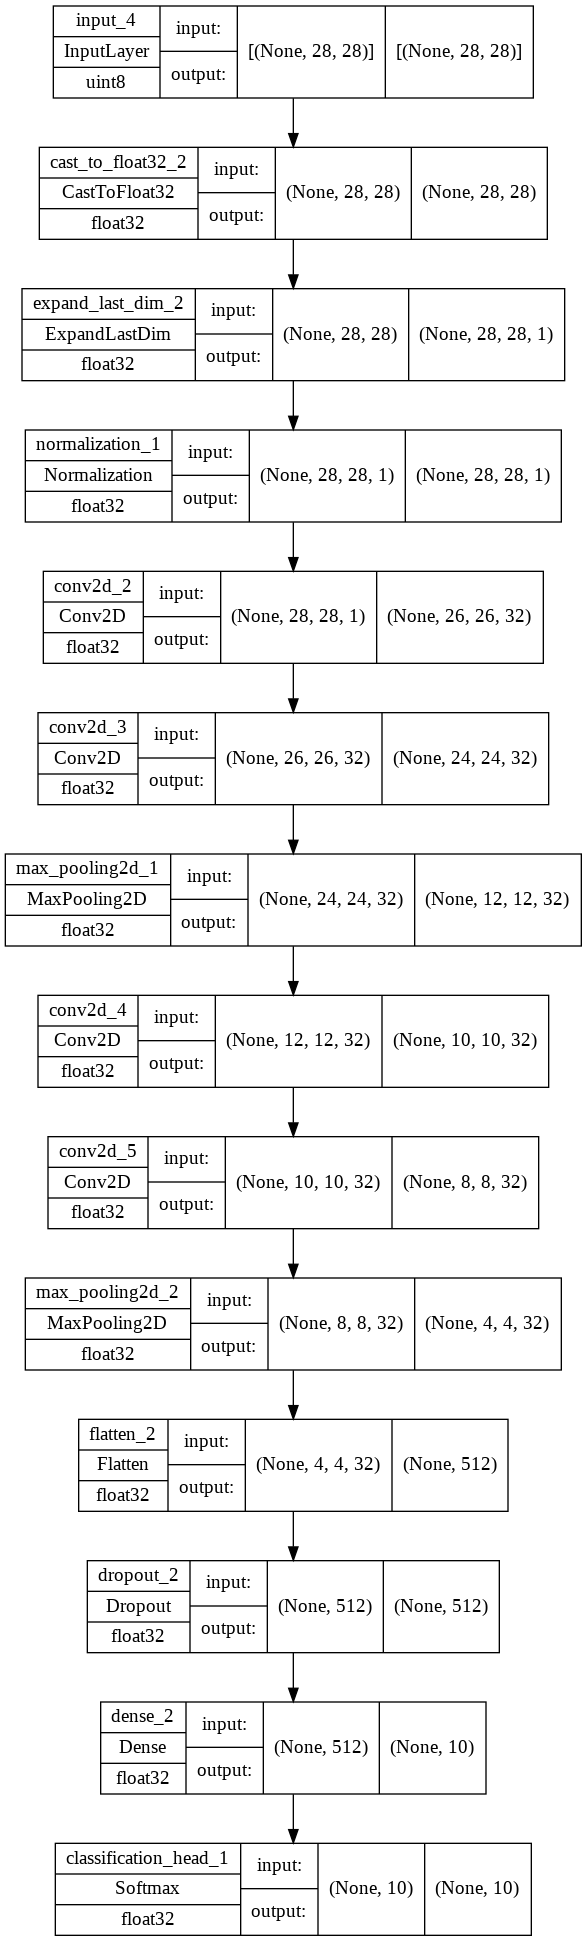

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

#### Creating an image regressor

Now, we will use a different approach to figure out the digit values from the image, a regression model call regressor. 

The image regressor will try to predict the scalar value of the digit, instead to classify it in a 0-9 a category. 

AutoKeras has already a special class ready to use called ImageRegressor, that will find the best 
regression model. 

As we did with the classifier, for this little example, we set max_trials (the maximum number of different Keras Models to try) to 1 and the number of epochs to train each model to 20, but for real use it is recommended to set a large number of trials and not to set the epochs parameter to use an adaptive number of epochs automatically.

In [ ]:
# Initialize the image regressor.
reg = ak.ImageRegressor(
    overwrite=True,
    max_trials=1)

# Feed the image regressor with training dataset.
reg.fit(x_train, y_train, epochs=20)

# Predict with the best model found.
predicted_y = reg.predict(x_test)

# Evaluate the best model with testing dataset.
reg.evaluate(x_test, y_test)

NameError: ignored

In [ ]:
# Predict with the best model found the first 10 digits.
predicted_y = reg.predict(x_test[:10])
# Print the first 10 true values
print(list(y_test[:10]))
# Print the predicted values to compare
print([round(float(i)) for i in predicted_y])

As you can see it's predinting the true value in everyone of the cases. Let's see it in a more graphical way

In [ ]:
fig = plt.figure()
for i, v in enumerate(predicted_y):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_axis_off()
    ax.set_title(round(float(v)))
    plt.imshow(x_test[i])
plt.show()

Notice that we have rounded up the float values returned by the regressor to compare them to the true values, this is done because regressors always return continuous values that they approximate the real value, so if we want to predict discrete values (0 to 9 digits) we have to do a rounding to return the predicted value.

### Visualizing the regressor model

In [ ]:
# First we export the model to a keras model
model = reg.export_model()

# Now, we ask for the model Sumary:
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(reg.export_model())